In [200]:
# ANALYZING BILABIALS {m, b, p, B}

import sys
import os
from os import listdir
import glob, re

path_on= r"/media/erickgch/EGC/MT-FBK-internship/on-off/on_eng/heroes*.csv"
path_off= r"/media/erickgch/EGC/MT-FBK-internship/on-off/off_eng/heroes*.csv"
path_mix= r"/media/erickgch/EGC/MT-FBK-internship/on-off/mixed_eng//heroes*.csv"

segs_on, segs_off, segs_mix = [], [], []

for fname in glob.glob(path_on):
    fname_ = ''.join(re.findall(r'(s\d.+)\.', fname))
    segs_on.append(fname_)
    
for fname in glob.glob(path_off):
    fname_ = ''.join(re.findall(r'(s\d.+)\.', fname))
    segs_off.append(fname_)
    
for fname in glob.glob(path_mix):
    fname_ = ''.join(re.findall(r'(s\d.+)\.', fname))
    segs_mix.append(fname_)

path_ = '/media/erickgch/EGC/MT-FBK-internship/alignments/heroes_s2_11'

def get_phonemes(path):

    clues_es, clues_en, screen_v = [], [], []
    for subdir, dirs, files in os.walk(path):
        for f in files:
            try:
                grid = textgrids.TextGrid(join(subdir, f))
                f_name = ''.join(re.findall(r'(s\d.+\d)\.', f))
            except TypeError:
                print('File ' + f + ' not in proper TextGrid format')
                pass
            screen_cat = []
            temp_en = []
            temp_es = []
            for it in grid['MAU']:
                if '_spa_' in f:
                    temp_es.append((it.text, it.xmin, it.xmax))
                elif '_eng_' in f:
                    temp_en.append((it.text, it.xmin, it.xmax))
            # language category condition
            if len(temp_es) > 0:
                clues_es.append(temp_es)
                temp_es, temp_en = [], []
            else:
                clues_en.append(temp_en)
                temp_en, temp_es = [], []
            # screen category condition
            if f_name in segs_on:
                screen_v.append('on')
            elif f_name in segs_off:
                screen_v.append('off')
            elif f_name in segs_mix:
                screen_v.append('mix')
            else:
                screen_v.append('NON')
            
                
    return clues_en, clues_es, screen_v

def get_labials(func):

    labials = ['b', 'B', 'p', 'm']
    exclusions = ['<p:>']

    lab_segs_eng, lab_segs_spa = [], []
    screen_v_ = func[2]
    phr_count_eng, phr_count_spa = 0, 0

    for phr_en in func[0]:
        phr_count_eng += 1
        temp_ = []
        for i in phr_en:
            if set(labials).intersection(i[0]):
                if i[0] not in exclusions:
                    temp_.append(i)
            else:
                pass
        lab_segs_eng.append((str(path_[-5:])+'_seg'+str(phr_count_eng), temp_))
        temp_ = []

    for phr_es in func[1]:
        phr_count_spa += 1
        temp_ = []
        for k in phr_es:
            if set(labials).intersection(k[0]):
                if k[0] not in exclusions:
                    temp_.append(k)
            else:
                pass
        lab_segs_spa.append(('seg'+str(phr_count_spa), temp_))
        temp_ = []
        
    return lab_segs_eng, lab_segs_spa, screen_v_

labials_1 = get_labials(get_phonemes(path_))

import pandas as pd

my_df = pd.DataFrame({'ENG-SPA_id': [i[0] for i in labials_1[0]], 'Phonemes_ENG': [i[1] for i in labials_1[0]], 
                      'Phonemes_SPA': [i[1] for i in labials_1[1]], 'Screen': [i for i in labials_1[2][:len(labials_1[0])]]})
my_df['Total_phonemes_ENG'] = my_df['Phonemes_ENG'].apply(len)
my_df['Total_phonemes_SPA'] = my_df['Phonemes_SPA'].apply(len)

my_df

,ENG-SPA_id,Phonemes_ENG,Phonemes_SPA,Screen,Total_phonemes_ENG,Total_phonemes_SPA
0,s2_11_seg1,"[(p, 0.03, 0.08)]","[(m, 0.096, 0.146), (p, 0.306, 0.336)]",off,1,2
1,s2_11_seg2,"[(m, 0.11, 0.15)]","[(m, 0.126, 0.166), (p, 0.406, 0.476), (b, 1.0...",mix,1,4
2,s2_11_seg3,"[(p, 0.0, 0.03), (m, 0.37, 0.42), (p, 0.73, 0....","[(p, 0.006, 0.036), (p, 0.176, 0.206), (p, 0.5...",off,4,4
3,s2_11_seg4,[],[],on,0,0
4,s2_11_seg5,"[(b, 1.9, 2.01)]","[(B, 0.366, 0.426), (p, 1.456, 1.526)]",off,1,2
...,...,...,...,...,...,...
399,s2_11_seg400,"[(b, 0.65, 0.7)]","[(p, 0.436, 0.466)]",on,1,1
400,s2_11_seg401,[],[],off,0,0
401,s2_11_seg402,"[(b, 1.77, 1.8)]","[(p, 0.546, 1.136), (B, 1.516, 1.566), (B, 1.7...",on,1,3
402,s2_11_seg403,"[(p, 1.65, 1.68), (p, 1.93, 2.0), (b, 2.5, 2.59)]","[(B, 1.206, 1.246), (p, 2.016, 2.096)]",on,3,2


In [175]:
path1_ = '/media/erickgch/EGC/MT-FBK-internship/alignments/heroes_s3_16/segments_eng/heroes*'
path2_ = '/media/erickgch/EGC/MT-FBK-internship/alignments/heroes_s3_16/segments_spa/heroes*'

engsegs, spasegs = [], []

for fname in glob.glob(path1_):
    fname_ = ''.join(re.findall(r'(\d+)\.', fname))
    engsegs.append(fname_)
    
for fname in glob.glob(path2_):
    fname_ = ''.join(re.findall(r'(\d+)\.', fname))
    spasegs.append(fname_)
    

exceptions = list(set(engsegs)-set(spasegs)) + list(set(spasegs)-set(engsegs))
exceptions

[]

In [201]:
my_df.to_csv('mbp_phonemes_s2_11.csv')

In [227]:
df1 = pd.read_csv('mbp_phonemes_s2_1.csv')
df2 = pd.read_csv('mbp_phonemes_s2_6.csv')
df3 = pd.read_csv('mbp_phonemes_s2_10.csv')
df4 = pd.read_csv('mbp_phonemes_s3_2.csv')
df5 = pd.read_csv('mbp_phonemes_s3_8.csv')
df6 = pd.read_csv('mbp_phonemes_s3_9.csv')
df7 = pd.read_csv('mbp_phonemes_s3_11.csv')

alt_df = pd.read_csv('mbp_phonemes_s2_2.csv')
alt2_df = pd.read_csv('mbp_phonemes_s2_3.csv')
alt3_df = pd.read_csv('mbp_phonemes_s2_4.csv')
alt4_df = pd.read_csv('mbp_phonemes_s2_5.csv')
alt5_df = pd.read_csv('mbp_phonemes_s2_7.csv')
alt6_df = pd.read_csv('mbp_phonemes_s2_8.csv')
alt7_df = pd.read_csv('mbp_phonemes_s2_9.csv')
alt8_df = pd.read_csv('mbp_phonemes_s2_11.csv')
alt9_df = pd.read_csv('mbp_phonemes_s3_12.csv')
alt10_df = pd.read_csv('mbp_phonemes_s3_14.csv')
alt11_df = pd.read_csv('mbp_phonemes_s3_16.csv')

d_alt_df = alt_df.append(alt2_df.append(alt3_df.append
                                        (alt4_df.append(alt5_df.append(alt6_df.append
                                                                       (alt7_df.append(alt8_df.append
                                                                                       (alt9_df.append(alt10_df.append(alt11_df, ignore_index=True), ignore_index=True), ignore_index=True), ignore_index=True), ignore_index=True), ignore_index=True), ignore_index=True), ignore_index=True), ignore_index=True), ignore_index=True)


new_df = df1.append(df2, ignore_index=True)
new_df = new_df.append(df3, ignore_index=True)
new_df = new_df.append(df4, ignore_index=True)
new_df = new_df.append(df5, ignore_index=True)
new_df = new_df.append(df6, ignore_index=True)
new_df = new_df.append(df7, ignore_index=True)
new_df = new_df.append(d_alt_df, ignore_index=True)

new_df['Lab_difference'] = new_df['Total_phonemes_ENG'] - new_df['Total_phonemes_SPA']
new_df


,Unnamed: 0,ENG-SPA_id,Phonemes_ENG,Phonemes_SPA,Screen,Total_phonemes_ENG,Total_phonemes_SPA,Lab_difference
0,0,s2_1_seg1,[],"[('p', 2.246, 2.286), ('m', 2.926, 3.006), ('m...",off,0,5,-5
1,1,s2_1_seg2,[],"[('p', 0.0, 0.026), ('m', 0.426, 0.486), ('m',...",off,0,3,-3
2,2,s2_1_seg3,"[('p', 1.05, 1.1), ('b', 1.35, 1.38), ('m', 3....","[('p', 1.396, 1.426), ('B', 1.616, 1.686), ('m...",off,3,3,0
3,3,s2_1_seg4,"[('m', 0.33, 1.76), ('m', 2.0, 2.04), ('m', 3....","[('m', 0.616, 1.436), ('p', 1.586, 1.646), ('m...",off,6,10,-4
4,4,s2_1_seg5,"[('m', 1.71, 1.8), ('m', 3.9, 3.94), ('b', 4.0...","[('B', 0.366, 0.416), ('m', 0.746, 0.816), ('p...",mix,3,7,-4
...,...,...,...,...,...,...,...,...
5917,370,s3_16_seg371,"[('m', 0.04, 0.38), ('m', 0.9, 1.25)]","[('m', 1.676, 1.756), ('b', 1.756, 1.796)]",on,2,2,0
5918,371,s3_16_seg372,"[('p', 0.56, 0.59), ('b', 1.31, 1.41), ('m', 2...","[('p', 0.0, 0.036), ('p', 0.356, 0.396)]",on,3,2,1
5919,372,s3_16_seg373,[],[],on,0,0,0
5920,373,s3_16_seg374,"[('m', 0.72, 2.27), ('p', 3.04, 3.08), ('m', 3...","[('b', 2.136, 2.176), ('p', 2.706, 2.776), ('m...",mix,3,5,-2


In [228]:
on_segments = new_df[new_df['Screen'] == 'on']
off_segments = new_df[new_df['Screen'] == 'off']
mix_segments = new_df[new_df['Screen'] == 'mix']

-0.6891470671578351 1.5422980259569852
Ttest_relResult(statistic=-26.54418763988731, pvalue=1.0549428566570625e-141)


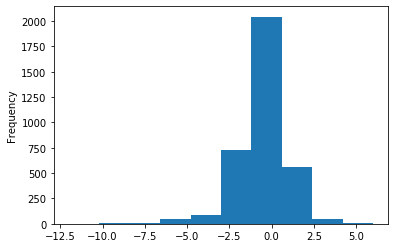

In [230]:
import scipy.stats as stats

lab_diff_sum = on_segments['Lab_difference'].sum()
lab_diff_std = on_segments['Lab_difference'].std()
lab_diff_mean = lab_diff_sum / len(on_segments['Lab_difference'])
print(lab_diff_mean, lab_diff_std)

# T-test
print(stats.ttest_rel(on_segments['Total_phonemes_ENG'], on_segments['Total_phonemes_SPA']))

# Plot distribution of difference of bilabials per segment between ENG & SPA
on_segments['Lab_difference'].plot.hist()

-0.7328699106256207 1.660301897730843
Ttest_relResult(statistic=-14.007304258435683, pvalue=7.407087437648752e-41)


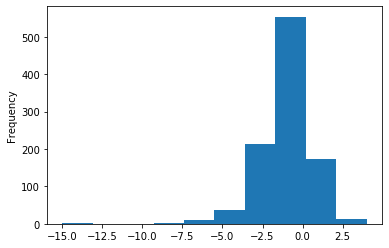

In [231]:
lab_diff_sum = off_segments['Lab_difference'].sum()
lab_diff_std = off_segments['Lab_difference'].std()
lab_diff_mean = lab_diff_sum / len(off_segments['Lab_difference'])
print(lab_diff_mean, lab_diff_std)

# T-test
print(stats.ttest_rel(off_segments['Total_phonemes_ENG'], off_segments['Total_phonemes_SPA']))

# Plot distribution of difference of bilabials per segment between ENG & SPA
off_segments['Lab_difference'].plot.hist()

-1.202494497432135 2.078155654459515
Ttest_relResult(statistic=-21.36254312414745, pvalue=1.4686474783814125e-87)


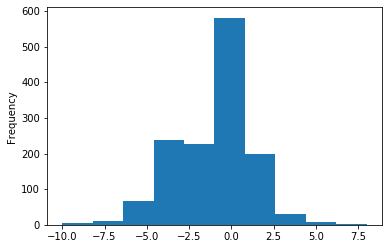

In [233]:
lab_diff_sum = mix_segments['Lab_difference'].sum()
lab_diff_std = mix_segments['Lab_difference'].std()
lab_diff_mean = lab_diff_sum / len(mix_segments['Lab_difference'])
print(lab_diff_mean, lab_diff_std)

# T-test
print(stats.ttest_rel(mix_segments['Total_phonemes_ENG'], mix_segments['Total_phonemes_SPA']))

# Plot distribution of difference of bilabials per segment between ENG & SPA
mix_segments['Lab_difference'].plot.hist()